In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('house_prices.csv')

In [36]:
df.head()

,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Status_encoded,Transaction_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,500,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,1.0,0,3
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,473,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,2.0,0,3
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,779,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,2.0,0,3
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,530,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1.0,0,3
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,635,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,2.0,0,3


In [37]:
df.shape

(187531, 20)

In [38]:
df.isnull().sum()

Title                       0
Description              3023
Amount(in rupees)           0
location                    0
Carpet Area                 0
Status                    615
Floor                    7077
Transaction                83
Furnishing               2897
facing                  70233
overlooking             81436
Society                109678
Bathroom                  828
Balcony                 48935
Car Parking            103357
Ownership               65517
Super Area             107685
BHK                       953
Status_encoded              0
Transaction_encoded         0
dtype: int64

In [39]:
df.isnull().sum() / len(df)

Title                  0.000000
Description            0.016120
Amount(in rupees)      0.000000
location               0.000000
Carpet Area            0.000000
Status                 0.003279
Floor                  0.037738
Transaction            0.000443
Furnishing             0.015448
facing                 0.374514
overlooking            0.434254
Society                0.584853
Bathroom               0.004415
Balcony                0.260944
Car Parking            0.551146
Ownership              0.349366
Super Area             0.574225
BHK                    0.005082
Status_encoded         0.000000
Transaction_encoded    0.000000
dtype: float64

In [40]:
df = df.drop(columns = ['Index','Price (in rupees)'])

KeyError: "['Index', 'Price (in rupees)'] not found in axis"

In [42]:
df.head()

,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Status_encoded,Transaction_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,500,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,1,0,3
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,473,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,2,0,3
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,779,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,2,0,3
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,530,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,0,3
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,635,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,2,0,3


In [43]:
df['BHK'] = df['Title'].str.split().str[0]

In [44]:
df['BHK'].head()

0    1
1    2
2    2
3    1
4    2
Name: BHK, dtype: object

In [45]:
import pandas as pd
import numpy as np

def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.strip()
        
        if value.lower() == 'call for price' or not value:
            return 0
        
        if 'Cr' in value:
            return float(value.replace('Cr', '').strip()) * 10**7 
        elif 'Lac' in value:
            return float(value.replace('Lac', '').strip()) * 10**5
    
    try:
        return float(value)
    except ValueError:
        return 0

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_to_numeric)

df.head()


,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Status_encoded,Transaction_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,500,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,1,0,3
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,473,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,2,0,3
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,779,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,2,0,3
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,530,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,0,3
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,635,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,2,0,3


In [46]:
df['Status'].unique()

array(['Ready to Move', nan], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df.head()

,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Status_encoded,Transaction_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,500,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,1,0,3
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,473,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,2,0,3
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,779,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,2,0,3
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,530,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,0,3
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,635,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,2,0,3


In [48]:
le = LabelEncoder()

df['Transaction_encoded'] = le.fit_transform(df['Transaction'])

df.head()

,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Status_encoded,Transaction_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,500,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,1,0,3
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,473,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,2,0,3
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,779,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,2,0,3
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,530,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,0,3
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,635,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,2,0,3


In [49]:
df['Society'].unique()

array(['Srushti Siddhi Mangal Murti Complex', 'Dosti Vihar',
       'Sunrise by Kalpataru', ..., 'Silver City Greens',
       'Nirmaan Royale Empire', 'Jaivee Radha Enclave'],
      shape=(10377,), dtype=object)

In [50]:
df['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [51]:
df['Carpet Area'].fillna(0)

0          500
1          473
2          779
3          530
4          635
          ... 
187526       0
187527       0
187528    1250
187529       0
187530       0
Name: Carpet Area, Length: 187531, dtype: int64

In [52]:
df['Carpet Area'].unique()

array([ 500,  473,  779, ..., 1526, 1634,  136], shape=(2455,))

In [53]:
def convert_area(value):
    if isinstance(value, str):
        value = value.strip().lower()
        if 'sqyrd' in value:
            num = float(value.replace('sqyrd', '').strip())
            return num * 9  # 1 sq yard = 9 sqft
        elif 'sqft' in value:
            return float(value.replace('sqft', '').strip())
        elif 'sqm' in value:
            return float(value.replace('sqm', '').strip()) * 10.7639  # 1 sqm = 10.7639 sqft
    return 0

df['Carpet Area'] = df['Carpet Area'].apply(convert_area).astype(int)


In [54]:
df.head()

,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Status_encoded,Transaction_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,0,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,1,0,3
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,2,0,3
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,2,0,3
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,0,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,0,3
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,2,0,3


In [55]:
df = df.drop(['Dimensions', 'Plot Area'], axis = 1)

KeyError: "['Dimensions', 'Plot Area'] not found in axis"

In [59]:
df.head()

,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Status_encoded,Transaction_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,0,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,1,0,3
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,2,0,3
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,2,0,3
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,0,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,0,3
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,2,0,3


In [60]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['number'])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(numerical_cols)
scaled_df = pd.DataFrame(scaled_data, columns = numerical_cols.columns)

print('Scaled DataFrame (only num cols):')
print(scaled_df.head())

Scaled DataFrame (only num cols):
   Amount(in rupees)  Carpet Area  Status_encoded  Transaction_encoded
0           0.000300          0.0             0.0                 0.75
1           0.000700          0.0             0.0                 0.75
2           0.001000          0.0             0.0                 0.75
3           0.000179          0.0             0.0                 0.75
4           0.001143          0.0             0.0                 0.75


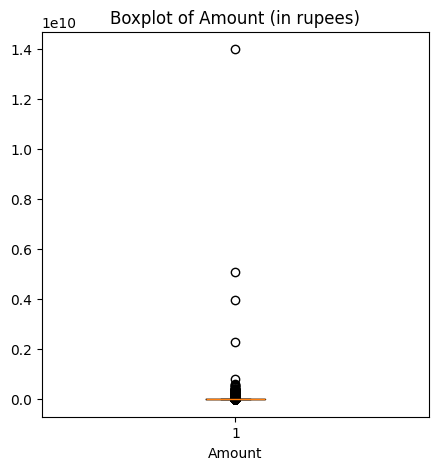

In [61]:
plt.figure(figsize=(5, 5))
plt.boxplot(df['Amount(in rupees)'].dropna(), vert=True)
plt.title('Boxplot of Amount (in rupees)')
plt.xlabel('Amount')
plt.show()


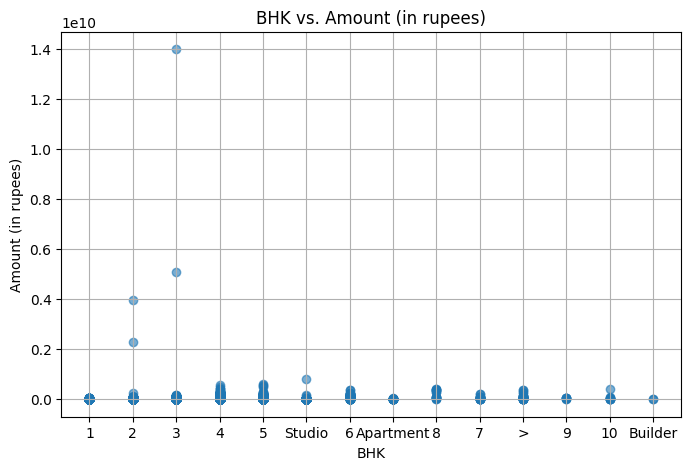

In [62]:
plt.figure(figsize=(8, 5))
plt.scatter(df['BHK'], df['Amount(in rupees)'], alpha=0.6)
plt.title('BHK vs. Amount (in rupees)')
plt.xlabel('BHK')
plt.ylabel('Amount (in rupees)')
plt.grid(True)
plt.show()


In [63]:
print(df['BHK'].unique())
print(df['BHK'].dtype)


['1' '2' '3' '4' '5' 'Studio' '6' 'Apartment' '8' '7' '>' '9' '10'
 'Builder']
object


In [64]:
df['BHK'] = pd.to_numeric(df['BHK'], errors='coerce')


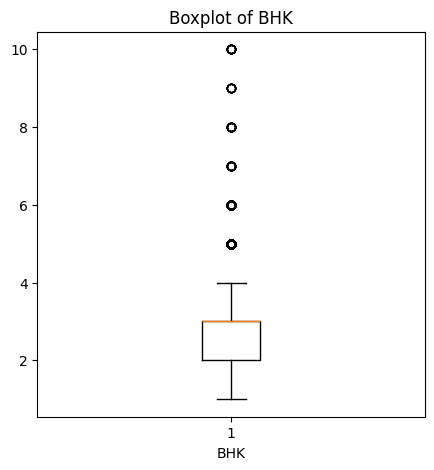

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.boxplot(df['BHK'].dropna(), vert=True)
plt.title('Boxplot of BHK')
plt.xlabel('BHK')
plt.show()


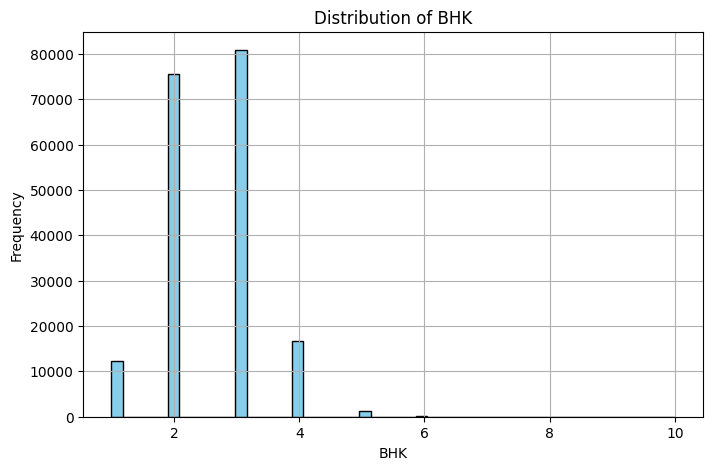

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['BHK'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of BHK')
plt.xlabel('BHK')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [67]:
scaled_df.head()

,Amount(in rupees),Carpet Area,Status_encoded,Transaction_encoded
0,0.000300,0.0,0.0,0.75
1,0.000700,0.0,0.0,0.75
2,0.001000,0.0,0.0,0.75
3,0.000179,0.0,0.0,0.75
4,0.001143,0.0,0.0,0.75


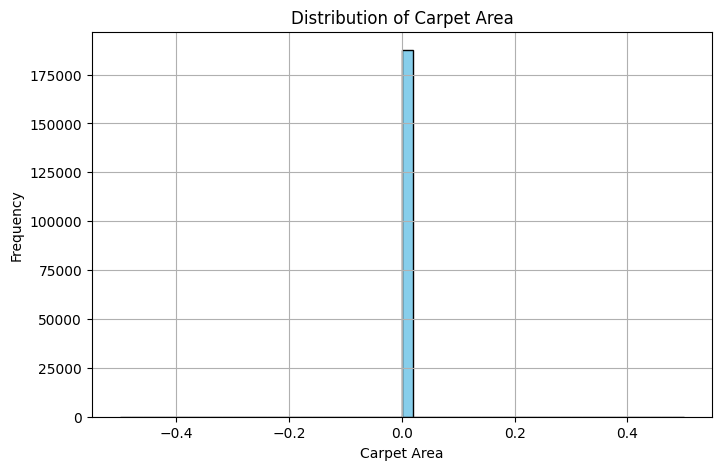

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(scaled_df['Carpet Area'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Carpet Area')
plt.xlabel('Carpet Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



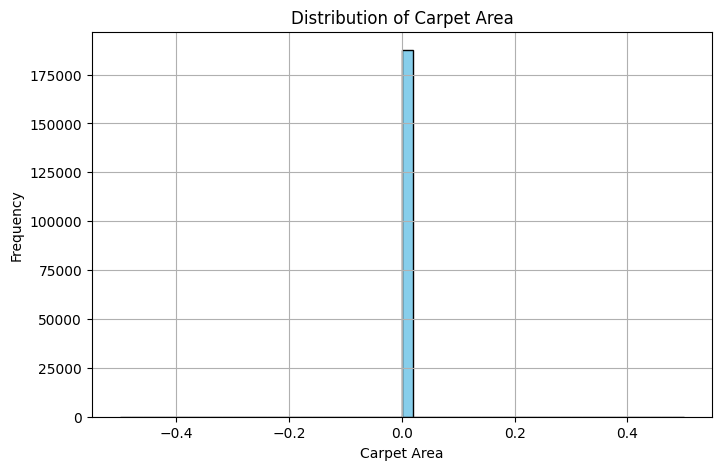

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(scaled_df['Carpet Area'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Carpet Area')
plt.xlabel('Carpet Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [70]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_cols = df.select_dtypes(include=['number'])

scaler = StandardScaler()

scaled_data = scaler.fit_transform(numerical_cols)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols.columns)

print('Standard Scaled DataFrame (only numerical columns):')
print(scaled_df.head())


Standard Scaled DataFrame (only numerical columns):
   Amount(in rupees)  Carpet Area       BHK  Status_encoded  \
0          -0.186053          0.0 -2.009383       -0.057361   
1          -0.040590          0.0 -0.728229       -0.057361   
2           0.068507          0.0 -0.728229       -0.057361   
3          -0.230211          0.0 -2.009383       -0.057361   
4           0.120458          0.0 -0.728229       -0.057361   

   Transaction_encoded  
0             0.546536  
1             0.546536  
2             0.546536  
3             0.546536  
4             0.546536  


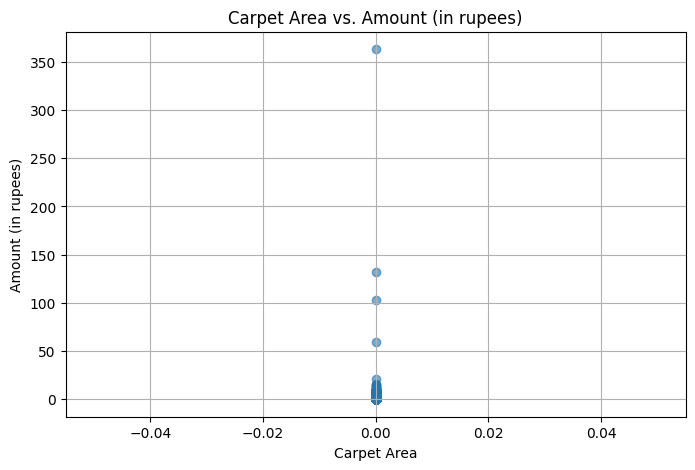

In [71]:
plt.figure(figsize=(8, 5))
plt.scatter(scaled_df['Carpet Area'], scaled_df['Amount(in rupees)'], alpha=0.6)
plt.title('Carpet Area vs. Amount (in rupees)')
plt.xlabel('Carpet Area')
plt.ylabel('Amount (in rupees)')
plt.grid(True)
plt.show()


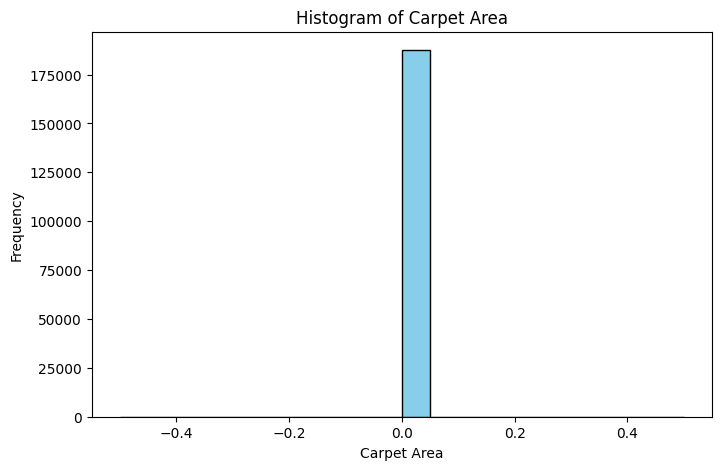

In [72]:
plt.figure(figsize=(8, 5))
plt.hist(scaled_df['Carpet Area'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Carpet Area')
plt.xlabel('Carpet Area')
plt.ylabel('Frequency')
plt.show()